In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project("visual_and_COT_data")
animals_to_remove = ['test', 'test2', 'punish_test', 'prueba']
animals = [animal for animal in animals if animal not in animals_to_remove]
# # retrieve the data for the remaining animals
# for mouse in animals:
#     local_path = Path(utils.get_outpath()) / Path("visual_and_COT_data") / Path("sessions") / Path(mouse)
#     # create the directory if it doesn't exist
#     local_path.mkdir(parents=True, exist_ok=True)
#     # download the session data
#     utils.rsync_cluster_data(
#         project_name="visual_and_COT_data",
#         file_path="sessions/{}/{}.csv".format(mouse, mouse),
#         local_path=str(local_path),
#         credentials=utils.get_idibaps_cluster_credentials(),
#     )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path("visual_and_COT_data") / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_96314/1331498781.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
time_of_restraint_removal_start = '2025-06-10 14:00:00'
time_of_restraint_removal_end = '2025-08-28 08:00:00'
time_before_removal = pd.to_datetime(time_of_restraint_removal_start) - pd.Timedelta(days=45)
time_after_reintroduction = pd.to_datetime(time_of_restraint_removal_end) + pd.Timedelta(days=30)

# transform the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')


In [4]:
# remove the dates when mirrors were introduced
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-07-21 08:00:00'),
                      df['date'] > pd.to_datetime('2025-07-25 20:00:00'))]
# remove time when sound stopped working
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-07-02 08:00:00'),
                      df['date'] > pd.to_datetime('2025-07-07 20:00:00'))]
# TV stopped
df = df[np.logical_or(df['date'] < pd.to_datetime('2025-08-01 15:00:00'),
                      df['date'] > pd.to_datetime('2025-08-03 15:00:00'))]
# started culling animals
df = df[df['date'] < pd.to_datetime('2025-09-29 08:00:00')]
# remove the 2025-06-10, 21 and 23 date, and 07/07 nad 08
dates_to_remove = [pd.to_datetime('2025-06-10').date(),
    pd.to_datetime('2025-06-21').date(),
    pd.to_datetime('2025-06-23').date(),
    pd.to_datetime('2025-07-07').date(),
    pd.to_datetime('2025-08-08').date()]
df = df[~df['date'].dt.date.isin(dates_to_remove)]

In [5]:
df = dft.add_early_pokeouts(df)

In [75]:

df_before = df[np.logical_and(df['date'] > time_before_removal, 
                        df['date'] < pd.to_datetime(time_of_restraint_removal_start))]
df_after = df[np.logical_and(df['date'] >= pd.to_datetime(time_of_restraint_removal_start), 
                        df['date'] < pd.to_datetime(time_of_restraint_removal_end))]
df_after_after = df[np.logical_and(df['date'] >= pd.to_datetime(time_of_restraint_removal_end), 
                        df['date'] < time_after_reintroduction)]

check early pokeout rates

/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/plots.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["column_name_to_substitute"] = df["stimulus_modality"] + "\n" + df["correct_side"]
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/plots.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["column_name_to_substitute"] = df["stimulus_modality"] + "\n" + df["correct_side"]
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/plots.py:262:

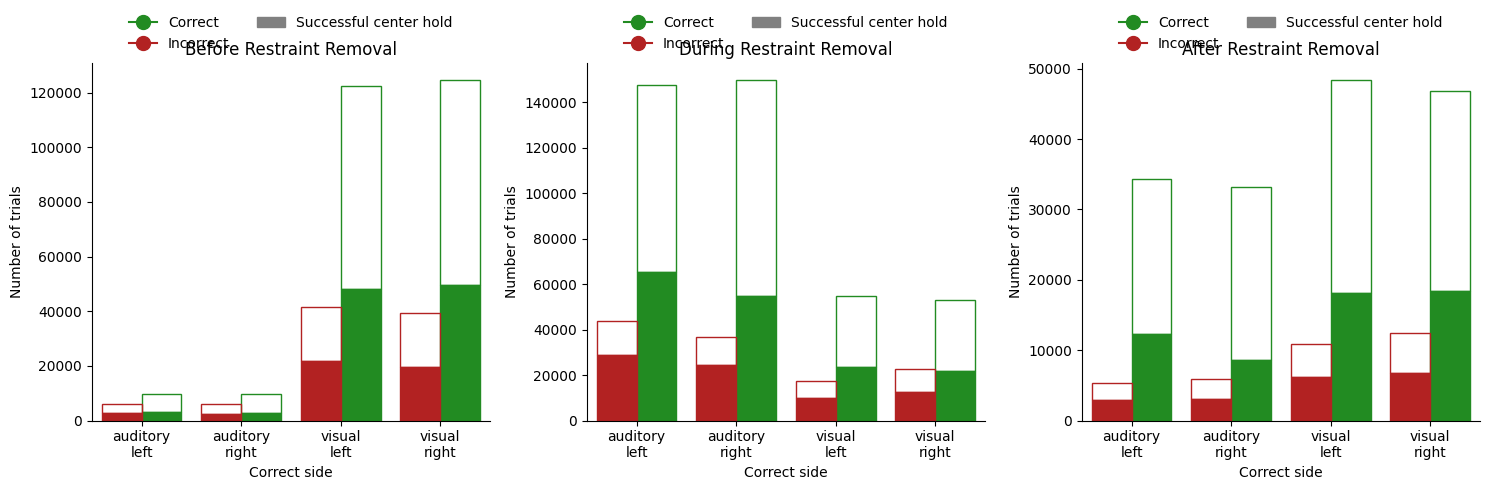

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0] = plots.number_of_correct_responses_plot(df_before, ax=axs[0])
axs[1] = plots.number_of_correct_responses_plot(df_after, ax=axs[1])
axs[2] = plots.number_of_correct_responses_plot(df_after_after, ax=axs[2])
# add titles
axs[0].set_title('Before Restraint Removal')
axs[1].set_title('During Restraint Removal')
axs[2].set_title('After Restraint Removal')
plt.tight_layout()
plt.show()

In [77]:
ep_rates_df = pd.DataFrame()
for mod in ["visual", "auditory"]:
    for df_to_use, label in zip([df_before, df_after, df_after_after],
                              ['Before removal', 'During no restraints', 'After reintroduction']):
        df_subset = df_to_use[df_to_use.stimulus_modality == mod]
        incorrect_ep_rate = 100*df_subset[df_subset.correct == False].early_pokeout.value_counts(normalize=True).get(True, 0)
        correct_ep_rate = 100*df_subset[df_subset.correct == True].early_pokeout.value_counts(normalize=True).get(True, 0)
        ep_rates_df = pd.concat([ep_rates_df, pd.DataFrame({
            'stimulus_modality': [mod, mod],
            'condition': [label, label],
            'correctness': ['incorrect', 'correct'],
            'early_pokeout_rate': [incorrect_ep_rate, correct_ep_rate]
        })], ignore_index=True)

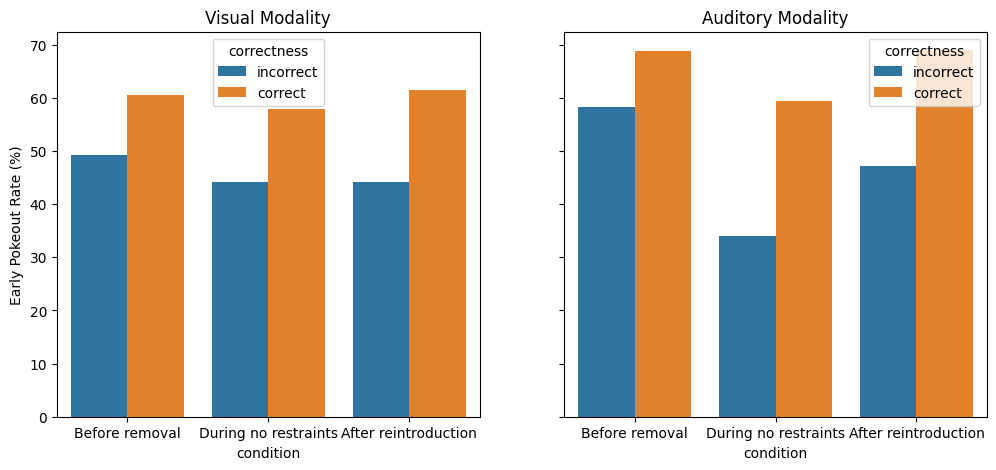

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.barplot(data=ep_rates_df[ep_rates_df.stimulus_modality == 'visual'], 
            x='condition', y='early_pokeout_rate', hue='correctness', ax=axs[0])
axs[0].set_title('Visual Modality')
axs[0].set_ylabel('Early Pokeout Rate (%)')
sns.barplot(data=ep_rates_df[ep_rates_df.stimulus_modality == 'auditory'], 
            x='condition', y='early_pokeout_rate', hue='correctness', ax=axs[1])
axs[1].set_title('Auditory Modality')
axs[1].set_ylabel('Early Pokeout Rate (%)')
plt.show()

In [79]:
# do the frequency of occurrence of each difficulty level
df_before.groupby(["stimulus_modality", "difficulty"])["difficulty"].agg("count") / df_before.shape[0] * 100

stimulus_modality  difficulty
auditory           easy           8.649296
visual             easy          70.367741
                   hard          10.440955
                   medium        10.542008
Name: difficulty, dtype: float64

In [80]:
df_after.groupby(["stimulus_modality", "difficulty"])["difficulty"].agg("count") / df_after.shape[0] * 100

stimulus_modality  difficulty
auditory           easy          60.924294
                   hard           5.463429
                   medium         5.438733
visual             easy          22.392670
                   hard           2.880748
                   medium         2.900126
Name: difficulty, dtype: float64

In [81]:
df_after_after.groupby(["stimulus_modality", "difficulty"])["difficulty"].agg("count") / df_after_after.shape[0] * 100

stimulus_modality  difficulty
auditory           easy          39.94728
visual             easy          60.05272
Name: difficulty, dtype: float64

In [82]:
# there are some hard and medium trials in auditory modality. Check if in these sessions there is a difference of early pokeouts
# TODO!! Caution! there are also multisensory sessions and these could be different!
df_to_check = df_after[df_after.current_training_stage == 'TwoAFC_auditory_hard']
df_to_check_epr = pd.DataFrame()
for dif in ["easy", "medium", "hard"]:
    df_subset = df_to_check[df_to_check.difficulty == dif]
    incorrect_ep_rate = 100*df_subset[df_subset.correct == False].early_pokeout.value_counts(normalize=True).get(True, 0)
    correct_ep_rate = 100*df_subset[df_subset.correct == True].early_pokeout.value_counts(normalize=True).get(True, 0)
    df_to_check_epr = pd.concat([df_to_check_epr, pd.DataFrame({
        'difficulty': [dif, dif],
        'correctness': ['incorrect', 'correct'],
        'early_pokeout_rate': [incorrect_ep_rate, correct_ep_rate]
    })], ignore_index=True)

<Axes: xlabel='difficulty', ylabel='early_pokeout_rate'>

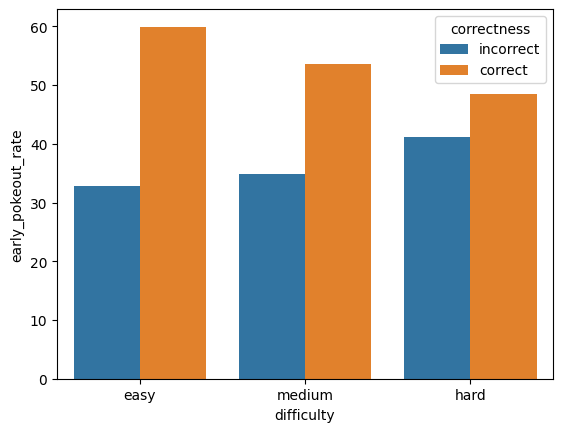

In [83]:
sns.barplot(data=df_to_check_epr, 
            x='difficulty', y='early_pokeout_rate', hue='correctness')

This does not explain it. It seems to be indeed different when they have no time restraints.

In [84]:
# test by subject removing hard sessions
mod = "auditory"
ep_rates_df_bs = pd.DataFrame()
for subject in df_after.subject.unique():
    for df_to_use, label in zip([df_before, df_after, df_after_after],
                              ['Before removal', 'During no restraints', 'After reintroduction']):
        
        # !!!! selecting only TwoAFC_auditory_easy, the decrease after removal is maintained
        # next time do this selecting sessions, not by training stage as there are manual_training_stage cases
        # actually, in that case, I don't have enough data as many subjects did not have that type of sessions always
        
        # df_to_use = df_to_use[df_to_use.current_training_stage == 'TwoAFC_auditory_easy']
        df_subset = df_to_use[(df_to_use.stimulus_modality == mod) & (df_to_use.subject == subject)]
        incorrect_ep_rate = 100*df_subset[df_subset.correct == False].early_pokeout.value_counts(normalize=True).get(True, 0)
        correct_ep_rate = 100*df_subset[df_subset.correct == True].early_pokeout.value_counts(normalize=True).get(True, 0)
        ep_rates_df_bs = pd.concat([ep_rates_df_bs, pd.DataFrame({
            'subject': [subject, subject],
            'condition': [label, label],
            'correctness': ['incorrect', 'correct'],
            'early_pokeout_rate': [incorrect_ep_rate, correct_ep_rate]
        })], ignore_index=True)

In [85]:
# calculate significance with paired t-test
from scipy.stats import ttest_rel
for correctness in ['correct', 'incorrect']:
    before = ep_rates_df_bs[(ep_rates_df_bs.condition == 'Before removal') & (ep_rates_df_bs.correctness == correctness)].early_pokeout_rate
    during = ep_rates_df_bs[(ep_rates_df_bs.condition == 'During no restraints') & (ep_rates_df_bs.correctness == correctness)].early_pokeout_rate
    after = ep_rates_df_bs[(ep_rates_df_bs.condition == 'After reintroduction') & (ep_rates_df_bs.correctness == correctness)].early_pokeout_rate
    t_stat_before_during, p_value_before_during = ttest_rel(before, during)
    t_stat_during_after, p_value_during_after = ttest_rel(during, after)
    t_stat_before_after, p_value_before_after = ttest_rel(before, after)
    print(f'Significance for {correctness} early pokeout rates:')
    print(f'Before removal vs During no restraints: t-statistic = {t_stat_before_during:.4f}, p-value = {p_value_before_during:.4f}')
    print(f'During no restraints vs After reintroduction: t-statistic = {t_stat_during_after:.4f}, p-value = {p_value_during_after:.4f}')
    print(f'Before removal vs After reintroduction: t-statistic = {t_stat_before_after:.4f}, p-value = {p_value_before_after:.4f}')

Significance for correct early pokeout rates:
Before removal vs During no restraints: t-statistic = 4.2489, p-value = 0.0021
During no restraints vs After reintroduction: t-statistic = -3.4139, p-value = 0.0077
Before removal vs After reintroduction: t-statistic = -0.0217, p-value = 0.9832
Significance for incorrect early pokeout rates:
Before removal vs During no restraints: t-statistic = 5.8366, p-value = 0.0002
During no restraints vs After reintroduction: t-statistic = -2.2744, p-value = 0.0490
Before removal vs After reintroduction: t-statistic = 2.1256, p-value = 0.0625


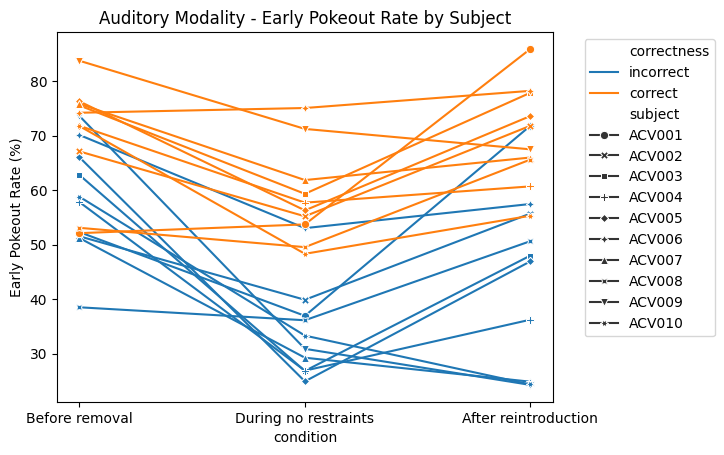

In [86]:
sns.lineplot(data=ep_rates_df_bs, 
             x='condition', y='early_pokeout_rate', hue='correctness', style='subject', markers=True, dashes=False)
plt.title('Auditory Modality - Early Pokeout Rate by Subject')
plt.ylabel('Early Pokeout Rate (%)')
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

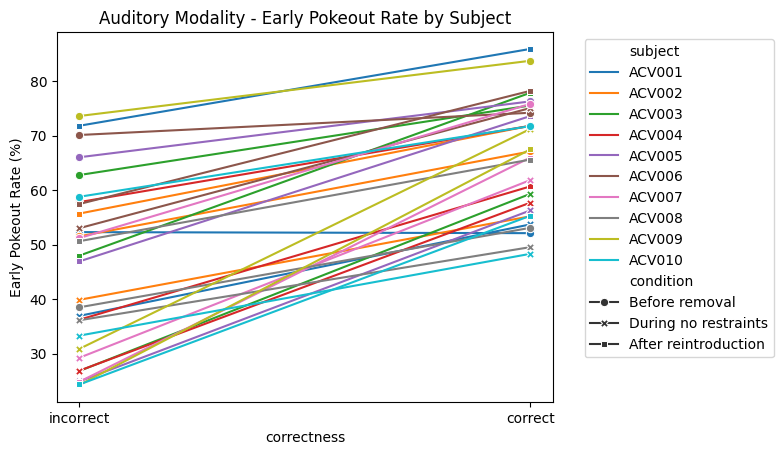

In [87]:
# relationship for each mouse between correct and incorrect early pokeout rates
sns.lineplot(data=ep_rates_df_bs, 
             x='correctness', y='early_pokeout_rate', hue='subject', style='condition', markers=True, dashes=False)
plt.title('Auditory Modality - Early Pokeout Rate by Subject')
plt.ylabel('Early Pokeout Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

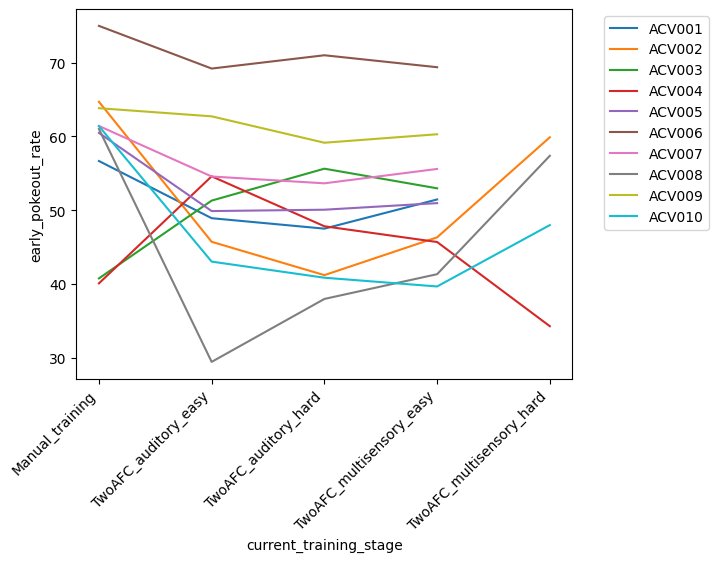

In [88]:
# compare in df_after the percentage of early pokeouts per traininig stage
gb_pts_df = df_after.groupby(['subject', 'current_training_stage'])['early_pokeout'].value_counts(normalize=True).mul(100).rename('early_pokeout_rate').reset_index()
sns.lineplot(data=gb_pts_df[gb_pts_df.early_pokeout == True], 
             x='current_training_stage', y='early_pokeout_rate', hue='subject')
# tilt the x labels
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

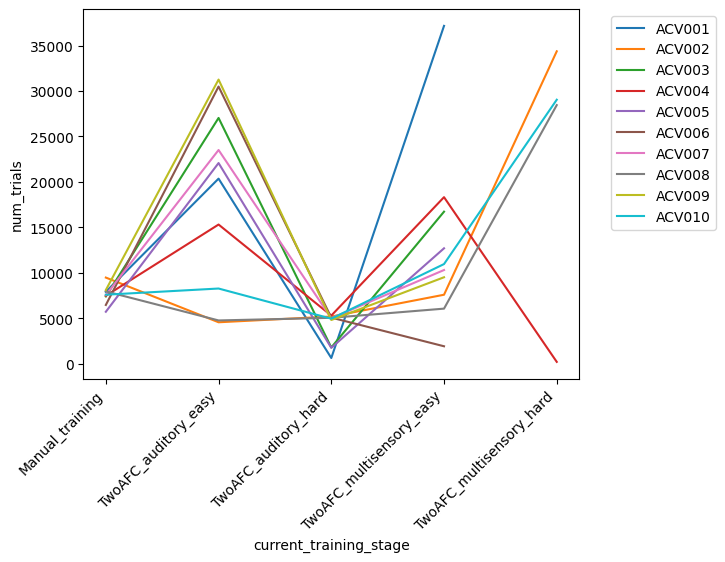

In [89]:
# compare in df_after the number of trials per traininig stage
gb_pts_df = df_after.groupby(['subject', 'current_training_stage']).agg('size').reset_index(name='num_trials')
sns.lineplot(data=gb_pts_df, 
             x='current_training_stage', y='num_trials', hue='subject')
# tilt the x labels
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [90]:
# Restrict the analysis to sessions with only easy trials in auditory modality
# and get rid of super short sessions (less than 5 trials)
mod = "auditory"
difficulty = "easy"
ae_ep_rate_df = pd.DataFrame()
for subject in df_after.subject.unique():
    for df_to_use, label in zip([df_before, df_after, df_after_after],
                              ['Before removal', 'During no restraints', 'After reintroduction']):
        df_subset = df_to_use[df_to_use.subject == subject]
        sessions_to_use = []
        # select only sessions with only easy trials in auditory modality
        for session in df_subset.session.unique():
            df_session = df_subset[df_subset.session == session]
            if len(df_session) >= 5:
                if all(df_session.difficulty == difficulty) and all(df_session.stimulus_modality == mod):
                    sessions_to_use = sessions_to_use + [session]
        df_subset = df_subset[df_subset.session.isin(sessions_to_use)]
        incorrect_ep_rate = 100*df_subset[df_subset.correct == False].early_pokeout.value_counts(normalize=True).get(True, 0)
        correct_ep_rate = 100*df_subset[df_subset.correct == True].early_pokeout.value_counts(normalize=True).get(True, 0)
        ae_ep_rate_df = pd.concat([ae_ep_rate_df, pd.DataFrame({
            'subject': [subject, subject],
            'condition': [label, label],
            'correctness': ['incorrect', 'correct'],
            'early_pokeout_rate': [incorrect_ep_rate, correct_ep_rate]
        })], ignore_index=True)

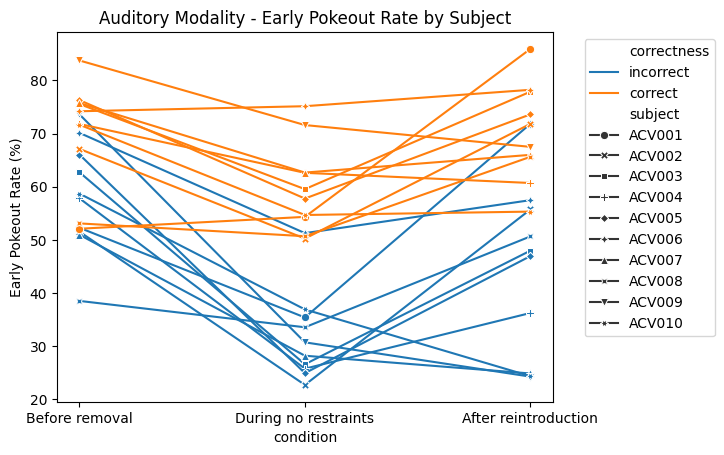

In [91]:
# observation is still maintained
sns.lineplot(data=ae_ep_rate_df, 
             x='condition', y='early_pokeout_rate', hue='correctness', style='subject', markers=True, dashes=False)
plt.title('Auditory Modality - Early Pokeout Rate by Subject')
plt.ylabel('Early Pokeout Rate (%)')
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [92]:
# calculate significance with paired t-test
for correctness in ['correct', 'incorrect']:
    before = ae_ep_rate_df[(ae_ep_rate_df.condition == 'Before removal') & (ae_ep_rate_df.correctness == correctness)].early_pokeout_rate
    during = ae_ep_rate_df[(ae_ep_rate_df.condition == 'During no restraints') & (ae_ep_rate_df.correctness == correctness)].early_pokeout_rate
    after = ae_ep_rate_df[(ae_ep_rate_df.condition == 'After reintroduction') & (ae_ep_rate_df.correctness == correctness)].early_pokeout_rate
    t_stat_before_during, p_value_before_during = ttest_rel(before, during)
    t_stat_during_after, p_value_during_after = ttest_rel(during, after)
    t_stat_before_after, p_value_before_after = ttest_rel(before, after)
    print(f'Significance for {correctness} early pokeout rates:')
    print(f'Before removal vs During no restraints: t-statistic = {t_stat_before_during:.4f}, p-value = {p_value_before_during:.4f}')
    print(f'During no restraints vs After reintroduction: t-statistic = {t_stat_during_after:.4f}, p-value = {p_value_during_after:.4f}')
    print(f'Before removal vs After reintroduction: t-statistic = {t_stat_before_after:.4f}, p-value = {p_value_before_after:.4f}')

Significance for correct early pokeout rates:
Before removal vs During no restraints: t-statistic = 4.1415, p-value = 0.0025
During no restraints vs After reintroduction: t-statistic = -2.7748, p-value = 0.0216
Before removal vs After reintroduction: t-statistic = -0.0267, p-value = 0.9793
Significance for incorrect early pokeout rates:
Before removal vs During no restraints: t-statistic = 7.1099, p-value = 0.0001
During no restraints vs After reintroduction: t-statistic = -2.3738, p-value = 0.0416
Before removal vs After reintroduction: t-statistic = 2.1213, p-value = 0.0629


Are the differences between the time conditions dependent on the length of the sessions?

In [94]:
nt_thr = 25
# short_sessions = sl_df[sl_df.num_trials < nt_thr].date.tolist()
# long_sessions = sl_df[sl_df.num_trials >= nt_thr].date.tolist()
session_sizes = pd.DataFrame()
mod = "auditory"
difficulty = "easy"
sl_ep_rate_df = pd.DataFrame()
for df_to_use, label in zip([df_before, df_after, df_after_after],
                          ['Before removal', 'During no restraints', 'After reintroduction']):
    sl_df = df_to_use.groupby('date').agg('size').reset_index(name='num_trials')
    # bin the sessions into chunks of nt_thr trials
    sl_df['session_length'] = pd.cut(sl_df['num_trials'], bins=range(0, sl_df['num_trials'].max() + nt_thr, nt_thr))
    # transform the interval into an integer for easier plotting
    sl_df['session_length'] = pd.to_numeric(sl_df['session_length'].apply(lambda x: f'{int(x.right-1)}'))
    for subject in df_to_use.subject.unique():
        df_subject = df_to_use[df_to_use.subject == subject]
        sessions_to_use = []
        for date in df_subject.date.unique():
            df_session = df_subject[(df_subject.subject == subject) & (df_subject.date == date)]
            if not df_session.empty:
                if all(df_session.difficulty == difficulty) and all(df_session.stimulus_modality == mod):
                    sessions_to_use = sessions_to_use + [date]
                    session_sizes = pd.concat([session_sizes, pd.DataFrame({
                        'subject': [subject],
                        'date': [date],
                        'condition': [label],
                        'num_trials': [len(df_session)]
                    })], ignore_index=True)

        df_subset = df_subject[df_subject.date.isin(sessions_to_use)]
        # for selected_sessions, label in zip([short_sessions, long_sessions],
        #                             ['short sessions', 'long sessions']):
        for session_length_interval in sl_df.session_length.unique():
            selected_sessions = sl_df[sl_df.session_length == session_length_interval].date.tolist()            
            # label = str(session_length_interval)
            df_ss = df_subset[df_subset.date.isin(selected_sessions)]
            # ignore if there are no sessions in that bin
            if df_ss.empty:
                continue
            incorrect_ep_rate = 100*df_ss[df_ss.correct == False].early_pokeout.value_counts(normalize=True).get(True, 0)
            correct_ep_rate = 100*df_ss[df_ss.correct == True].early_pokeout.value_counts(normalize=True).get(True, 0)
            sl_ep_rate_df = pd.concat([sl_ep_rate_df, pd.DataFrame({
                'subject': [subject, subject],
                'session_length': [session_length_interval, session_length_interval],
                'correctness': ['incorrect', 'correct'],
                'early_pokeout_rate': [incorrect_ep_rate, correct_ep_rate],
                'condition': [label, label]
            })], ignore_index=True)

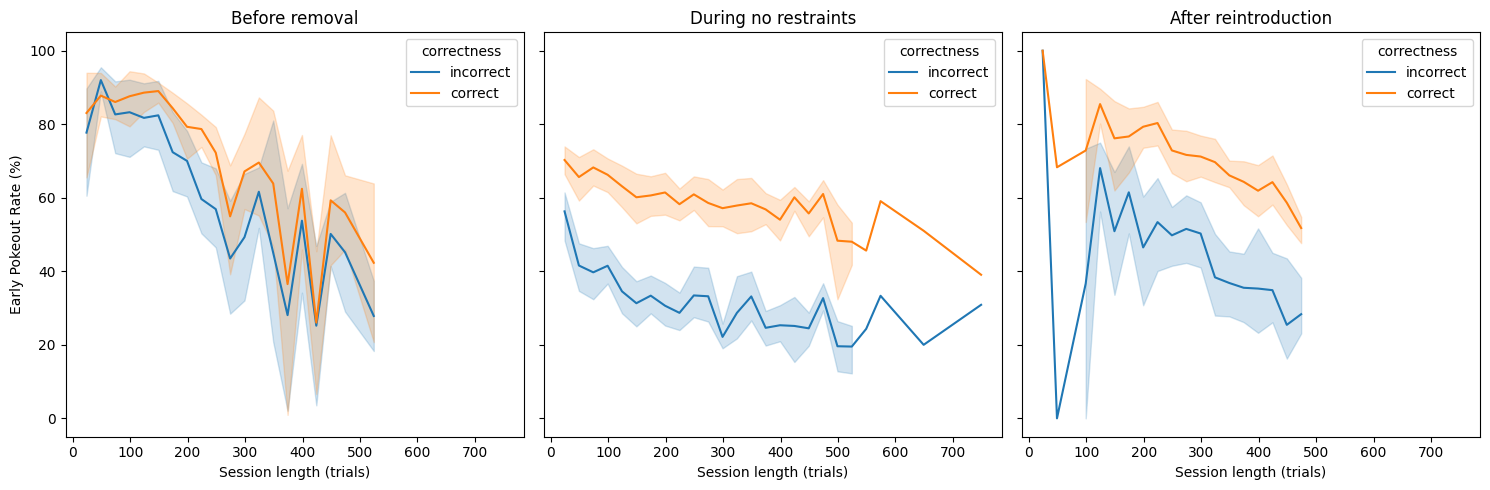

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
for ax, label in zip(axs, ['Before removal', 'During no restraints', 'After reintroduction']):
    sns.lineplot(data=sl_ep_rate_df[sl_ep_rate_df.condition == label], 
             x='session_length', y='early_pokeout_rate', hue='correctness', markers=True, dashes=False, ax=ax)
    ax.set_title(label)
    ax.set_xlabel('Session length (trials)')
    ax.set_ylabel('Early Pokeout Rate (%)')
    # put legend outside
    # ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


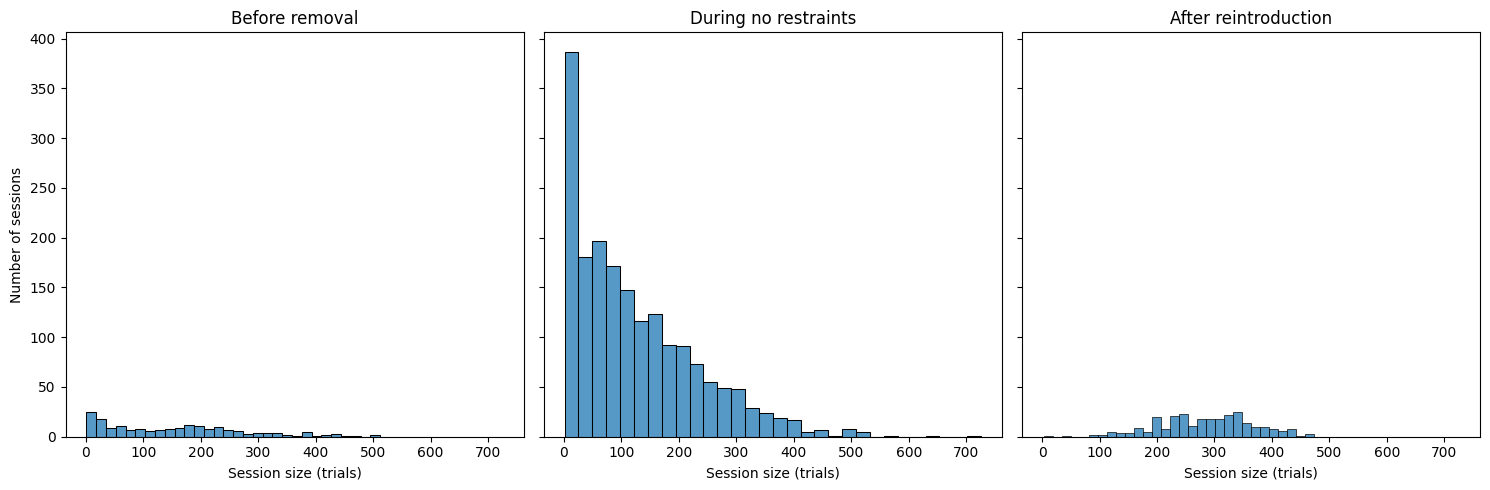

In [96]:
# plot histograms of session sizes per condition
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
for ax, label in zip(axs, ['Before removal', 'During no restraints', 'After reintroduction']):
    sns.histplot(data=session_sizes[session_sizes.condition == label], 
             x='num_trials', bins=30, ax=ax)
    ax.set_title(label)
    ax.set_xlabel('Session size (trials)')
    ax.set_ylabel('Number of sessions')
plt.tight_layout()
plt.show()

very interesting, the increase number in short sessions with no restraints might even counteract the effect that I see then...
As in, the majority of the sessions with no retrain are below 200 trials, which have higher early pokeout rates overall, and the majority of the sessions with restraints are above 200 trials, which have lower early pokeout rates overall.
things to check:
- is this due to a decrease on the number of breaks with time during the session?
- if so, can the % of breaks, early in the session, predict the length of the session?

In [97]:
df_before['restrained_condition'] = 'Before removal'
df_before['early_pokeout_rate'] = df_before['early_pokeout'].rolling(window=10).mean()
df_after['restrained_condition'] = 'During no restraints'
df_after['early_pokeout_rate'] = df_after['early_pokeout'].rolling(window=10).mean()
df_after_after['restrained_condition'] = 'After reintroduction'
df_after_after['early_pokeout_rate'] = df_after_after['early_pokeout'].rolling(window=10).mean()
df_all = pd.concat([df_before[df_before.date.isin(session_sizes.date)],
                    df_after[df_after.date.isin(session_sizes.date)],
                    df_after_after[df_after_after.date.isin(session_sizes.date)]])

/tmp/ipykernel_96314/3963402553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['restrained_condition'] = 'Before removal'
/tmp/ipykernel_96314/3963402553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['early_pokeout_rate'] = df_before['early_pokeout'].rolling(window=10).mean()
/tmp/ipykernel_96314/3963402553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

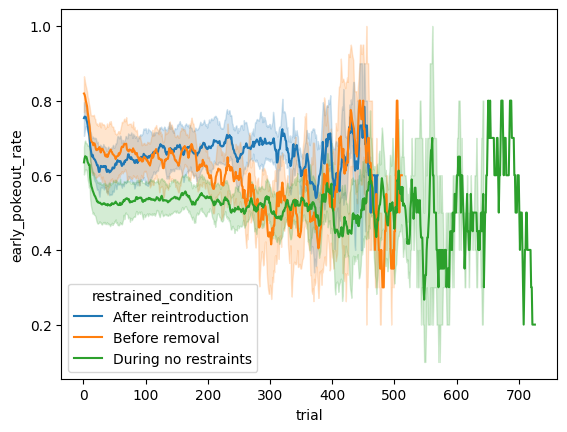

In [98]:
df_all_gb = df_all.groupby(['subject', 'restrained_condition', 'trial'])['early_pokeout_rate'].mean().reset_index()
sns.lineplot(data=df_all_gb, 
             x='trial', y='early_pokeout_rate', hue='restrained_condition', markers=True, dashes=False)
plt.show()

I don't think this applies anymore:

how is this plateau explained then? shouldn't the trials at the end of the session have lower early pokeout rates if longer sessions have lower early pokeout rates overall?
The only way to explain this is if the early pokeout rates increase with time in the session, but longer sessions start at a lower early pokeout rate.
e.g. in before retraint removal dataset, how can sessions with 200 trials have 70% early pokeout rate if from 0 to 200 trials the early pokeout rate is below 60%? --> Because there are more longer sessions than shorter sessions counteracting that effect. But yes, fixation break rates should increase with time in the session then, for longer sessions.

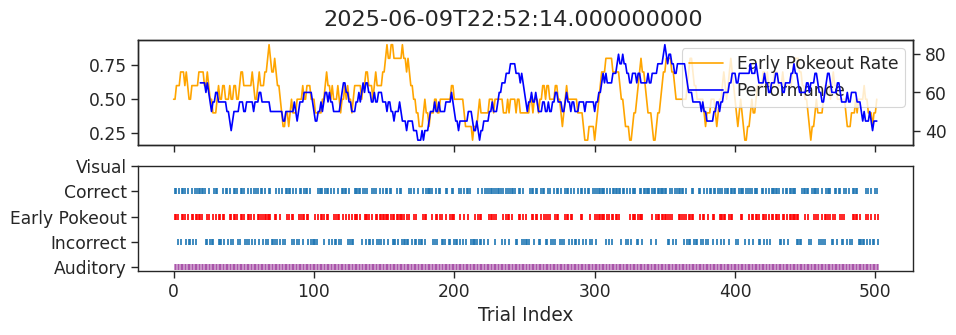

In [143]:
# plot a random session from the before dataset that has less than 200 trials
test_df = df_before[df_before.date.isin(session_sizes.date)].groupby('date').agg('size').reset_index(name='num_trials')
selected_date = test_df[test_df.num_trials > 400].date.sample().values[0]
df_session = df_before[df_before.date == selected_date]
df_session = dft.get_performance_through_trials(df_session, window=20)
fig, axs = plt.subplots(2,1,figsize=(10, 3), sharex=True)
axs[0].plot(
    range(len(df_session["early_pokeout_rate"])),
    df_session["early_pokeout_rate"],
    color = 'orange',
    label = 'Early Pokeout Rate',
)
# plot performance in a second y axis
ax2 = axs[0].twinx()
ax2.plot(
    range(len(df_session["performance_w"])),
    df_session["performance_w"],
    color = 'blue',
    label = 'Performance',
)
# set legend
lines, labels = axs[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axs[0].legend(lines + lines2, labels + labels2, loc='upper right')
axs[1].scatter(
    df_session.trial,
    df_session.correct,
    # color = df_session.correct.map(colors),
    label = 'Correct',
    marker = '|',
)
axs[1].scatter(
    df_session.trial,
    df_session.stimulus_modality.map({'visual': 1.5, 'auditory': -0.5}),
    color = 'purple',
    label = 'Stimulus Modality',
    marker = '|',
    alpha = 0.5,
)
axs[1].scatter(
    df_session.trial,
    df_session.early_pokeout.map({True: 0.5, False: np.nan}),
    color = 'red',
    label = 'Early Pokeout',
    marker = '|',
)
axs[1].set_xlabel("Trial Index")
axs[1].set_yticks([-0.5, 0, 0.5, 1, 1.5])
axs[1].set_yticklabels(['Auditory', 'Incorrect', 'Early Pokeout', 'Correct', 'Visual'])

plt.suptitle(f"{selected_date}")
plt.show()

Analyze occupancy

In [105]:
occupancy_df_before = dft.get_start_and_end_of_sessions_df(df_before)
daily_percentages_before = dft.get_daily_occupancy_percentages(occupancy_df_before)

occupancy_df_after = dft.get_start_and_end_of_sessions_df(df_after)
daily_percentages_after = dft.get_daily_occupancy_percentages(occupancy_df_after)

occupancy_df_after_after = dft.get_start_and_end_of_sessions_df(df_after_after)
daily_percentages_after_after = dft.get_daily_occupancy_percentages(occupancy_df_after_after)

In [106]:
# merge the two dataframes
# '25/30mins_4hours'
# '1min_1min'
occupancy_df_before['time_limit'] = 'ON'
occupancy_df_after['time_limit'] = 'OFF'
occupancy_df_after_after['time_limit'] = 'REINTRODUCED'
# turn daily percentages into a dataframe with the index as a column
daily_percentages_before = daily_percentages_before.reset_index()
daily_percentages_after = daily_percentages_after.reset_index()
daily_percentages_after_after = daily_percentages_after_after.reset_index()
daily_percentages_before['time_limit'] = 'ON'
daily_percentages_after['time_limit'] = 'OFF'
daily_percentages_after_after['time_limit'] = 'REINTRODUCED'
occupancy_df = pd.concat([occupancy_df_before, occupancy_df_after, occupancy_df_after_after], ignore_index=True)
daily_percentages = pd.concat([daily_percentages_before, daily_percentages_after, daily_percentages_after_after], ignore_index=False)

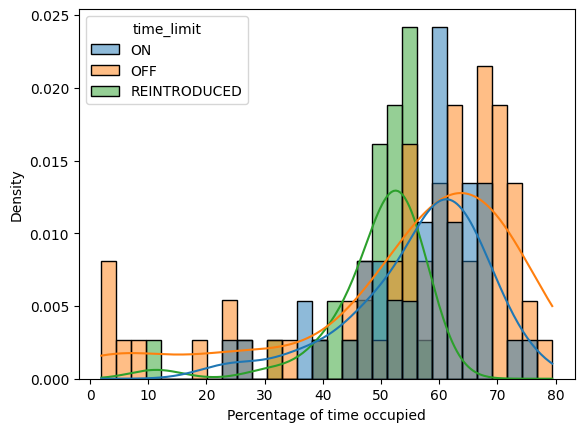

In [107]:
sns.histplot(data=daily_percentages, x='duration', hue='time_limit', stat='density', bins=30, kde=True)
plt.xlabel("Percentage of time occupied")
plt.show()

In [108]:
# night and day occupancy
occupancy_heatmap_before = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == 'ON'], window_size=120)
occupancy_heatmap_after = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == 'OFF'], window_size=120)
occupancy_heatmap_after_after = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == 'REINTRODUCED'], window_size=120)

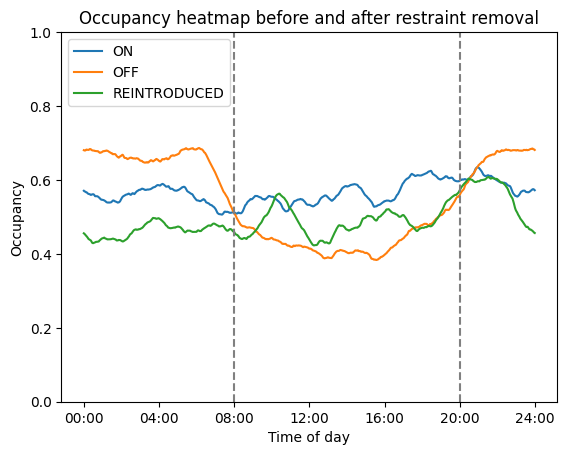

In [109]:
min_of_day = list(np.arange(0, len(occupancy_heatmap_before)))
hours_of_day = [x/60 for x in min_of_day]
plt.plot(hours_of_day, occupancy_heatmap_before, label='ON')
plt.plot(hours_of_day, occupancy_heatmap_after, label='OFF')
plt.plot(hours_of_day, occupancy_heatmap_after_after, label='REINTRODUCED')
# use HHMM format in x axis
plt.xticks(ticks=np.arange(0, 24.1, 4), labels=[f"{int(x):02d}:00" for x in np.arange(0, 24.1, 4)])
plt.xlabel("Time of day")
plt.ylabel("Occupancy")
plt.ylim(0, 1)
# vertical lines at 8:00 and 20:00
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=20, color='gray', linestyle='--')
plt.title("Occupancy heatmap before and after restraint removal")
plt.legend()
# save as pdf
plt.savefig("figures/occupancy_heatmap_no_time_restraints.pdf", bbox_inches='tight', transparent=True)

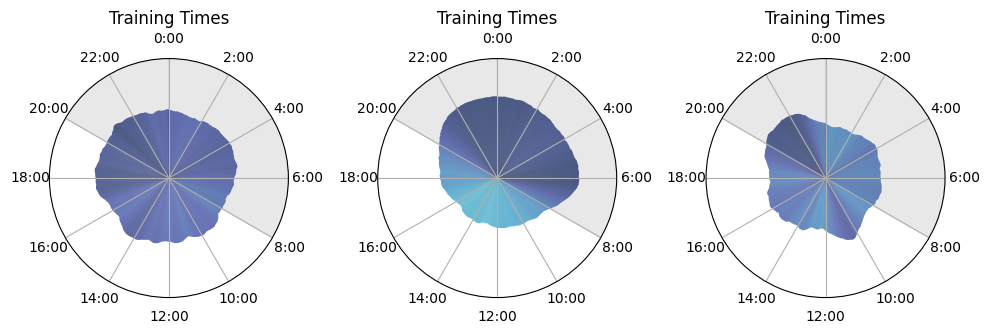

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10), subplot_kw={"projection": "polar"})
plots.plot_training_times_clock_heatmap(occupancy_heatmap_before, ax=axs[0], ylim=(0,1))
plots.plot_training_times_clock_heatmap(occupancy_heatmap_after, ax=axs[1], ylim=(0,1))
plots.plot_training_times_clock_heatmap(occupancy_heatmap_after_after, ax=axs[2], ylim=(0,1))
plt.tight_layout()
plt.show()

In [112]:
occupancy_df.time_limit.value_counts()

time_limit
OFF             3956
ON              1298
REINTRODUCED     570
Name: count, dtype: int64

In [113]:
occ_df_gb = occupancy_df.groupby(['subject', 'date', 'time_limit'])['duration'].sum().reset_index()
occ_df_gb['percentage_of_day'] = occ_df_gb['duration'] / 1440 * 100  # convert to percentage of day

In [114]:
occ_df_gini = occ_df_gb.groupby(['time_limit', 'subject'])['duration'].mean().reset_index()

In [115]:
# Gini coef
def get_gini(occ_sbjc):
    n = len(occ_sbjc)
    cum_subjects = np.arange(1, n + 1) / n
    cum_occupancy = np.cumsum(occ_sbjc) / occ_sbjc.sum()
    cum_occupancy = np.insert(cum_occupancy, 0, 0)
    cum_subjects = np.insert(cum_subjects, 0, 0)
    gini = 1 - 2 * np.trapz(cum_occupancy, cum_subjects)
    return gini

gini_dict = {}
for tl in occ_df_gini['time_limit'].unique():
    occ_sbjc = np.sort(occ_df_gini[occ_df_gini['time_limit'] == tl]['duration'].values)
    gini = get_gini(occ_sbjc)
    gini_dict[tl] = gini
    print(f"Gini coefficient for {tl}: {gini:.5f}")


Gini coefficient for OFF: 0.06756
Gini coefficient for ON: 0.03472
Gini coefficient for REINTRODUCED: 0.02365


In [116]:
# calculate the GINI per day and get mean and std
gini_daily = {}
for tl in occ_df_gb['time_limit'].unique():
    gini_daily[tl] = []
    for date in occ_df_gb[occ_df_gb['time_limit'] == tl]['date'].unique():
        occ_sbjc = np.sort(occ_df_gb[(occ_df_gb['time_limit'] == tl) & (occ_df_gb['date'] == date)]['duration'].values)
        gini = get_gini(occ_sbjc)
        gini_daily[tl].append(gini)
    mean_gini = np.mean(gini_daily[tl])
    std_gini = np.std(gini_daily[tl])
    print(f"Mean Gini coefficient for {tl}: {mean_gini:.5f} ± {std_gini:.5f}")


Mean Gini coefficient for ON: 0.12170 ± 0.04111
Mean Gini coefficient for OFF: 0.18997 ± 0.08979
Mean Gini coefficient for REINTRODUCED: 0.10554 ± 0.04834


In [117]:
# run a permutation of the time_limit labels to get a null distribution of Gini coefficients
n_permutations = 1000
gini_difs_list = []
for i in range(n_permutations):
    occ_df_gini_perm = occ_df_gini.copy()

    # for each mouse, shuffle the time_limit labels
    for subject in occ_df_gini_perm['subject'].unique():
        mask = occ_df_gini_perm['subject'] == subject
        time_limits = occ_df_gini_perm.loc[mask, 'time_limit'].values
        np.random.shuffle(time_limits)
        occ_df_gini_perm.loc[mask, 'time_limit'] = time_limits
    gini_perm = {}
    for tl in occ_df_gini_perm['time_limit'].unique():
        occ_sbjc = np.sort(occ_df_gini_perm[occ_df_gini_perm['time_limit'] == tl]['duration'].values)
        gini = get_gini(occ_sbjc)
        gini_perm[tl] = gini
    gini_dif = gini_perm['ON'] - gini_perm['OFF']
    gini_difs_list.append(gini_dif)

In [118]:
2*np.std(gini_difs_list)

0.03403493986879575

In [121]:
# do now a different thing to estimate GINI robustness.
# Run bootstrap resampling to estimate mean and std for Gini coefficients
n_bootstrap = 1000
gini_bootstrap = {'ON': [], 'OFF': []}
# for tl in occ_df_gb['time_limit'].unique():
for tl in ['ON', 'OFF']:
    occ_sbjc = occ_df_gb[occ_df_gb['time_limit'] == tl]
    n_observations = len(occ_sbjc)
    for i in range(n_bootstrap):
        sample = occ_sbjc.sample(n=n_observations, replace=True)
        sample_gb = sample.groupby(['time_limit', 'subject'])['duration'].mean().reset_index()
        occ_values = np.sort(sample_gb['duration'].values)
        gini = get_gini(occ_values)
        gini_bootstrap[tl].append(gini)

for tl in gini_bootstrap.keys():
    mean_gini = np.mean(gini_bootstrap[tl])
    std_gini = np.std(gini_bootstrap[tl])
    print(f"Bootstrap Mean Gini coefficient for {tl}: {mean_gini:.5f} ± {std_gini:.5f}")

Bootstrap Mean Gini coefficient for ON: 0.04180 ± 0.00731
Bootstrap Mean Gini coefficient for OFF: 0.07207 ± 0.00846


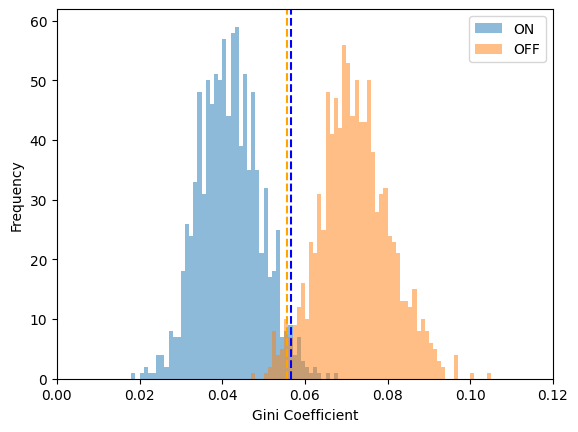

In [122]:
plt.hist(gini_bootstrap['ON'], alpha=0.5, label='ON', bins=np.arange(0, 1, 0.001))
plt.hist(gini_bootstrap['OFF'], alpha=0.5, label='OFF', bins=np.arange(0, 1, 0.001))
plt.legend()
plt.xlim(0, .12)
plt.xlabel("Gini Coefficient")
plt.ylabel("Frequency")
# add a vertical line at confidence intervals
topci_on = np.percentile(gini_bootstrap['ON'], 97.5)
bottomci_off = np.percentile(gini_bootstrap['OFF'], 2.5)
plt.axvline(x=topci_on, color='blue', linestyle='--')
plt.axvline(x=bottomci_off, color='orange', linestyle='--')

In [123]:
# resample the distributions ignoring the time limits to create a null distribution of Gini differences
n_permutations = 10000
gini_difs_null = []
for i in range(n_permutations):
    occ_df_gb_permuted = occ_df_gb.copy()
    # shuffle the time_limit labels
    occ_df_gb_permuted['time_limit'] = np.random.permutation(occ_df_gb_permuted['time_limit'].values)
    odgp_gb = occ_df_gb_permuted.groupby(['time_limit', 'subject'])['duration'].mean().reset_index()
    gini_permuted = {}
    for tl in occ_df_gb_permuted['time_limit'].unique():
        occ_values = np.sort(odgp_gb[odgp_gb['time_limit'] == tl]['duration'].values)
        gini = get_gini(occ_values)
        gini_permuted[tl] = gini
    gini_dif = gini_permuted['OFF'] - gini_permuted['ON']
    gini_difs_null.append(gini_dif)

In [124]:
# get the amount of times that the diff is higher than the observed difference
actual_diff = gini_dict['OFF'] - gini_dict['ON']
n_extreme = np.sum(np.array(gini_difs_null) >= actual_diff)
p_value = n_extreme / n_permutations
print(f"P-value from permutation test: {p_value:.5f}")

P-value from permutation test: 0.00050


Text(0, 0.5, 'Frequency')

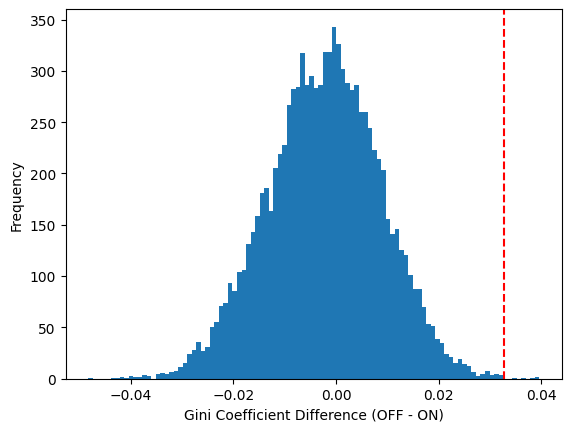

In [125]:
plt.hist(gini_difs_null, bins=100)
plt.axvline(x=actual_diff, color='red', linestyle='--', label='Observed Difference')
plt.xlabel("Gini Coefficient Difference (OFF - ON)")
plt.ylabel("Frequency")

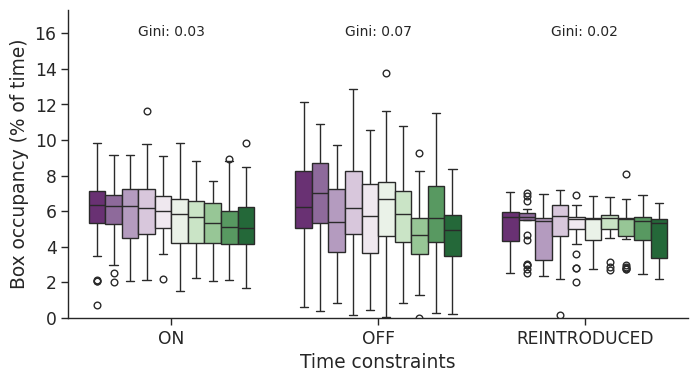

In [126]:
sort_order = occ_df_gb[occ_df_gb.time_limit=="ON"].groupby('subject')['duration'].median().sort_values(ascending=False).index
# specify a palette for the subjects that is good for categorical data
# palette = sns.color_palette("colorblind", len(sort_order))
palette = sns.color_palette("PRGn", len(sort_order))

sns.set_style('white')
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.4)

# save the order and palette in a dictionary with subject names as keys
sort_palette = {subject: palette[i] for i, subject in enumerate(sort_order)}
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=occ_df_gb, x='time_limit', y='percentage_of_day', hue='subject', hue_order=sort_order, palette=palette, ax=ax)
# plt.xticks(rotation=45)
# plt.title('Occupancy duration by time limit and subject')
# move legend to the right outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Box occupancy (% of time)')
plt.xlabel('Time constraints')
# plt.show()
# despine
sns.despine()
# increase a bit the y axis limits on the top
plt.ylim(0, plt.ylim()[1] * 1.2)
# write the gini coefficients on the plot
for i, tl in enumerate(occ_df_gb['time_limit'].unique()):
    gini = gini_dict[tl]
    plt.text(i, plt.ylim()[1] * 0.95, f"Gini: {gini:.2f}", ha='center', va='top', fontsize=10)
# remove legend
plt.legend().remove()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_occupancy_duration_by_subject.pdf', bbox_inches='tight', transparent=True)

<Axes: xlabel='time_limit', ylabel='duration'>

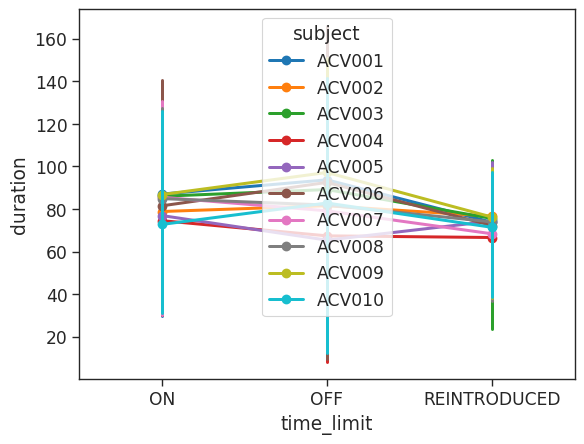

In [127]:
# compare each mouse before and after
sns.pointplot(data=occ_df_gb, x='time_limit', y='duration', hue='subject', native_scale=True, linestyles="-", errorbar=("pi", 95))

In [17]:
# check how the occupancy between mice correlates. This can be complex and is hard
# to interpret, as sometimes the box is stopped, so the correlation might be positive

In [128]:
utils.get_server_projects()

['auditory_escape_data',
 'cate_task_data',
 'COT_cannula_data',
 'COT_test_data',
 'visual_and_COT_data']

In [129]:
## plot a distribution with the histogram of number of trials in total and by mouse
selected_project = "visual_and_COT_data"
# get session summary data
local_path = Path(utils.get_outpath()) / Path(selected_project)
# download the session data
utils.rsync_cluster_data(
    project_name=selected_project,
    file_path="sessions_summary.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

receiving incremental file list

sent 27 bytes  received 88 bytes  32.86 bytes/sec
total size is 12,054,131  speedup is 104,818.53


In [130]:
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')
sessions_summary_df['year_month_day'] = sessions_summary_df['date'].dt.date
sessions_summary_df = sessions_summary_df[sessions_summary_df['year_month_day'].isin(occ_df_gb.date.unique())]
# copy the time_limit column from occ_df_gb to sessions_summary_df
sessions_summary_df = pd.merge(sessions_summary_df, occ_df_gb[['subject', 'date', 'time_limit']], left_on=['subject', 'year_month_day'], right_on=['subject', 'date'], how='left')
sessions_summary_df.drop(columns=['date_y'], inplace=True)
sessions_summary_df.rename(columns={'date_x': 'date'}, inplace=True)
sessions_summary_df.dropna(subset=['time_limit'], inplace=True)

In [131]:
# find if the session was during the night or day
def is_day_session(date: str) -> bool:
    """
    Check if the session is a day session based on the date.
    """
    hour = int(date.split(" ")[1].split(":")[0])
    return 8 <= hour < 19  # Daytime is considered from 8 AM to 8 PM

In [132]:
sessions_summary_df['is_day'] = sessions_summary_df['date'].apply(lambda x: is_day_session(x.strftime('%Y-%m-%d %H:%M:%S')))

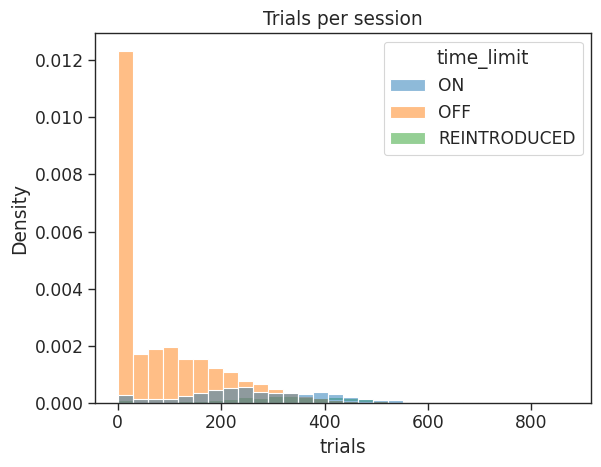

In [133]:
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='density', bins=30)
plt.title("Trials per session")
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_per_session_including_exploratory.pdf', bbox_inches='tight', transparent=True)

(0.0, 20.0)

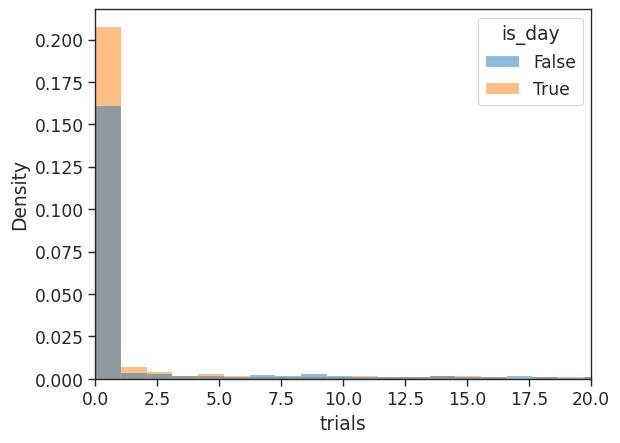

In [134]:
# separate between day and night sessions for the off dataset
sns.histplot(data=sessions_summary_df[sessions_summary_df['time_limit'] == 'OFF'], x='trials', hue='is_day', stat='density', bins=700)
plt.xlim(0, 20)

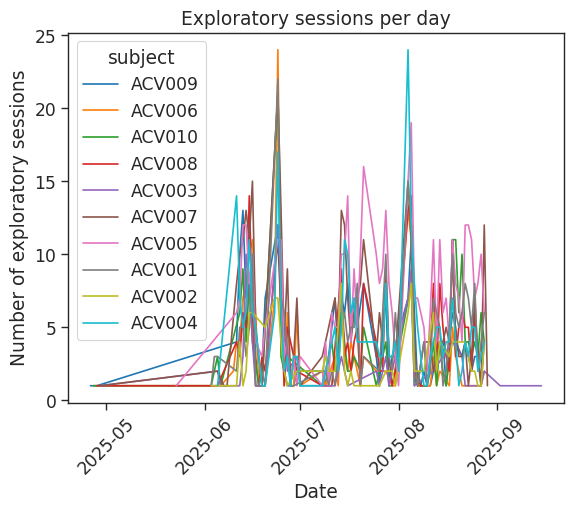

In [135]:
# get a number of exploratory entries (sessions with less than 10 trials)
# calculate the number of trials per day, and the number of sessions per day
exploratory_sessions = sessions_summary_df[sessions_summary_df['trials'] < 5]
# group them by date and subject and count them
exploratory_sessions = exploratory_sessions.groupby(['year_month_day', 'subject']).size().reset_index(name='count')
# plot them over time
sns.lineplot(data=exploratory_sessions, x='year_month_day', y='count', hue='subject')
plt.title("Exploratory sessions per day")
plt.xlabel("Date")
plt.ylabel("Number of exploratory sessions")
plt.xticks(rotation=45)

plt.show()

In [136]:
# remove them from the dataset
sessions_summary_df = sessions_summary_df[sessions_summary_df['trials'] >= 5]

In [137]:
trials_per_day = sessions_summary_df.groupby(['year_month_day', 'time_limit', 'subject']).agg({'trials': 'sum', 'task': 'count'}).reset_index()
# rename the columns
trials_per_day.rename(columns={'task': 'sessions'}, inplace=True)

In [ ]:
# cap the number of sessions to 10 for plotting
# trials_per_day['sessions'] = trials_per_day['sessions'].clip(upper=10)

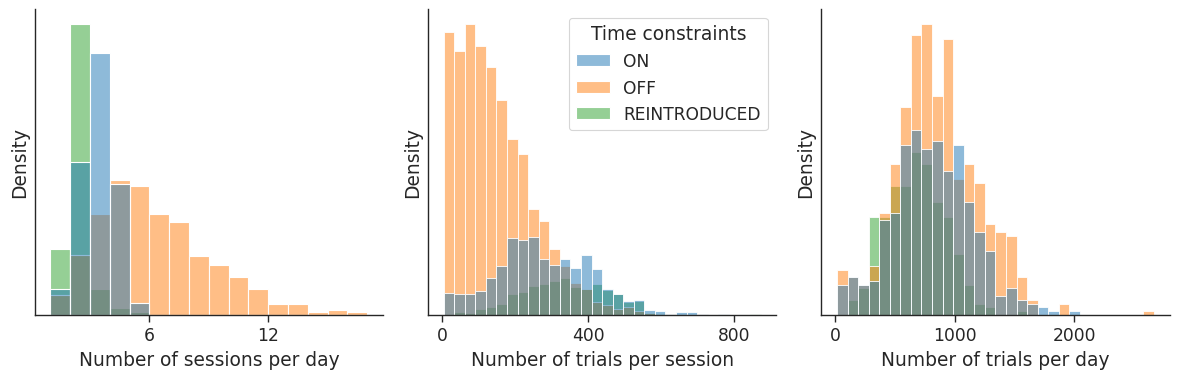

In [138]:
# plot three histograms, one for trials and one for sessions, and one for trials per session
sns.set_style('white')
sns.set_style('ticks')
sns.set_context("paper", font_scale=1.4)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data=trials_per_day, x='trials', hue='time_limit', stat='density', bins=30, ax=ax[2], legend=False)
sns.histplot(data=trials_per_day, x='sessions', hue='time_limit', stat='density', binwidth=1, ax=ax[0], legend=False)
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='density', bins=30, ax=ax[1], legend=True)
ax[2].set_xlabel("Number of trials per day")
ax[0].set_xlabel("Number of sessions per day")
ax[1].set_xlabel("Number of trials per session")
# change legend title
legend = ax[1].get_legend()
legend.set_title('Time constraints')
for a in ax:
    sns.despine(ax=a)
    # remove the y tick
    a.set_yticks([])
    # have 3 ticks in the x axis
    a.xaxis.set_major_locator(plt.MaxNLocator(3))

plt.tight_layout()
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day_without_exploratory_sessions.pdf', bbox_inches='tight', transparent=True)

In [139]:
# write csvs
trials_per_day.to_csv('figures/time_restraints_trials_per_day.csv', index=False)
sessions_summary_df.to_csv('figures/time_restraints_sessions_summary.csv', index=False)

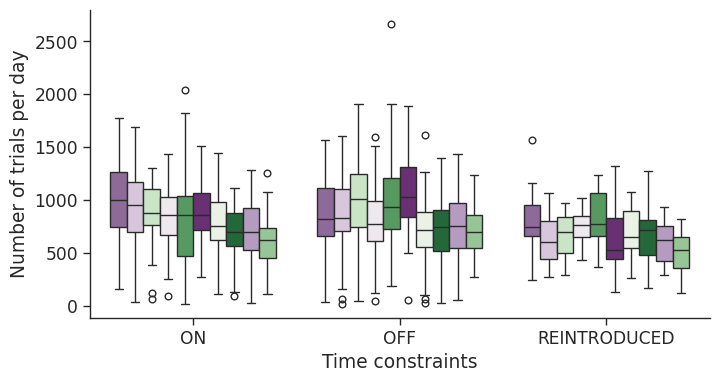

In [140]:
# make boxplots for each mouse as above
hue_order = sorted(trials_per_day['subject'].unique())
# trials_per_day['subject'] = pd.Categorical(trials_per_day['subject'], categories=hue_order, ordered=True)
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
new_sort_order = trials_per_day[trials_per_day.time_limit=='ON'].groupby('subject')['trials'].median().sort_values(ascending=False).index
new_palette = [sort_palette[subject] for subject in new_sort_order]
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=trials_per_day, x='time_limit', y='trials', hue='subject', hue_order=new_sort_order, palette=new_palette, ax=ax)
# sns.boxplot(data=trials_per_day, x='time_limit', y='sessions', ax=ax[1], hue='subject', hue_order=new_sort_order)
# ax[0].set_title('Trials per day by time limit and subject')
# ax[1].set_title('Sessions per day by time limit and subject')
# ax[0].get_legend().remove()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine()
plt.legend().remove()
plt.ylabel('Number of trials per day')
plt.xlabel('Time constraints')
# plt.title('Trials per day by subject')
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day_by_subject.pdf', bbox_inches='tight', transparent=True)

In [141]:
# plot performance by mouse over trials with vertical lines for the time of restraint removal
training_stage_to_look_at = "TwoAFC_auditory_easy"
df_tla = df[df['current_training_stage'] == training_stage_to_look_at]
df_tla = dft.analyze_df(df_tla)

In [142]:
df_tla["time_limit"] = np.where(
    df_tla['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)

NameError: name 'time_of_restraint_removal' is not defined

In [ ]:
df_to_plot_correct = df_tla.groupby(['subject', 'year_month_day', 'time_limit'])[['correct']].mean().reset_index()

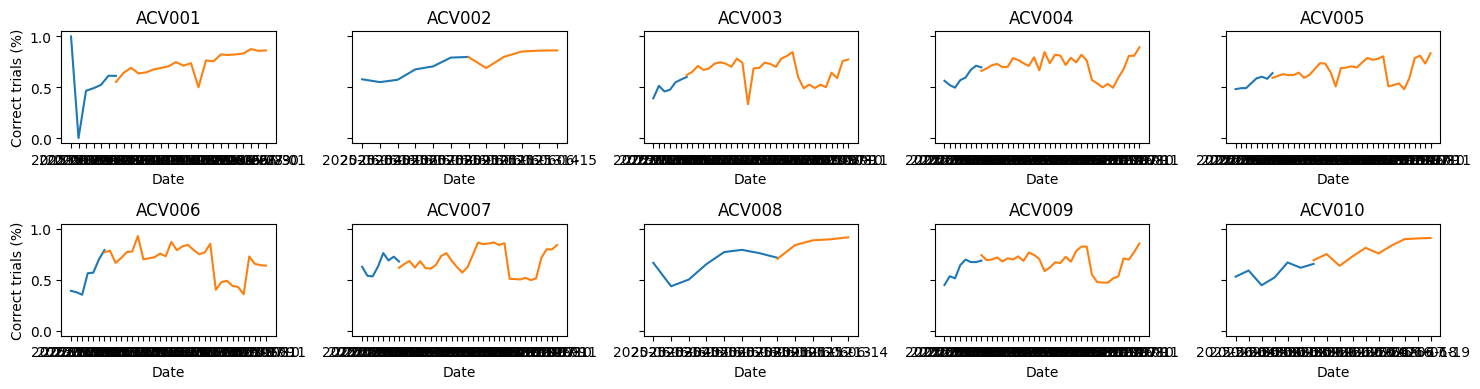

In [ ]:
ncols = df_to_plot_correct.subject.nunique() / 2
nrows = 2
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df_to_plot_correct.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='year_month_day', y='correct', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
# redo it by computing the performance in each trial.
df_subject_list = []
for mouse in animals:
    df_mouse = df_tla[df_tla['subject'] == mouse]
    # calculate the performances
    df_mouse = dft.get_performance_through_trials(df_mouse, window=100)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

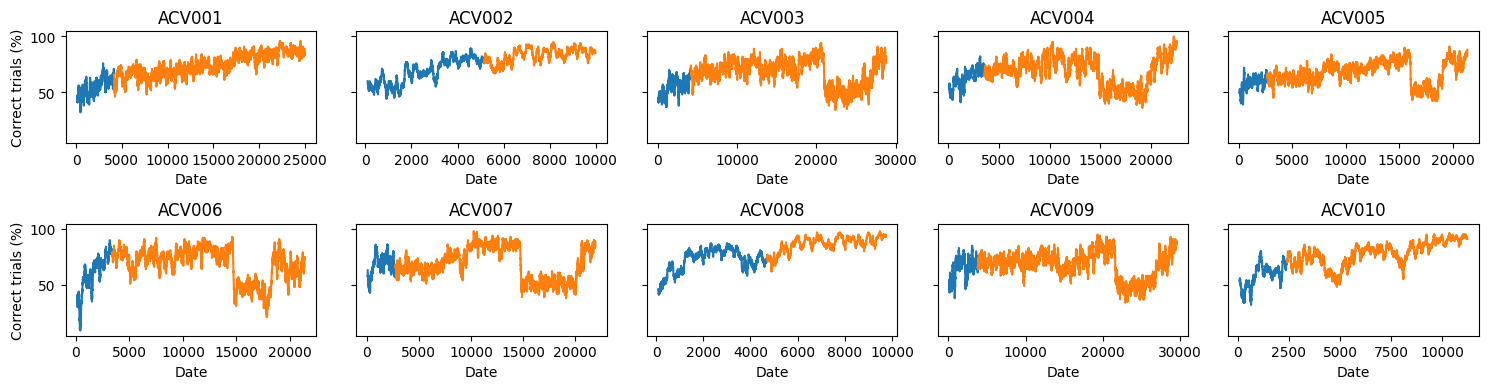

In [ ]:
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df2afc.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='total_trial', y='performance_w', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
## Differences between night and day sessions